In [190]:
import os
import numpy as np
import dbpy
import sys
import matplotlib.pyplot as plt
from math import *
import stpy
import ippy

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
from IPython.display import HTML
HTML("""
<script>
window.IPython = {
  notebook: {
    kernel: { execute: function(cmd) { console.log("kernel exec blocked:", cmd); } }
  }
};
</script>
""")

In [192]:
#output: -1: not yet exist, 0 = stopped (ready to read), 1: paused, 2: running)
run_newest = dbpy.read_runnumber_newest(3)
print(run_newest)

1616856


In [225]:
from mpccd import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [226]:
detectorID_MPCCD3 = 'MPCCD-1B1-M03-006'
detectorID_MPCCD2 = 'MPCCD-1N0-M06-004'
detectorID_MPCCD1 = 'MPCCD-1N0-M07-005'


base_path = "."

MPCCD_3 = MPCCDProcessing(base_path, detectorID_MPCCD3)
MPCCD_2 = MPCCDProcessing(base_path, detectorID_MPCCD2)
MPCCD_1 = MPCCDProcessing(base_path, detectorID_MPCCD1)

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1B1-M03-006
900
Run: 1616809
Number of images: 300
Detector ID: MPCCD-1B1-M03-006
Dark runs subtracted
200

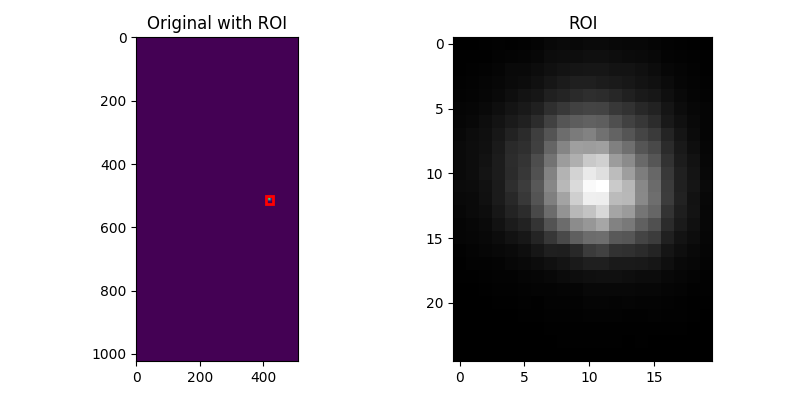

Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1B1-M03-006
900
Run: 1616809
Number of images: 300
Detector ID: MPCCD-1B1-M03-006
(300, 1024, 512)
Dark runs subtracted
200

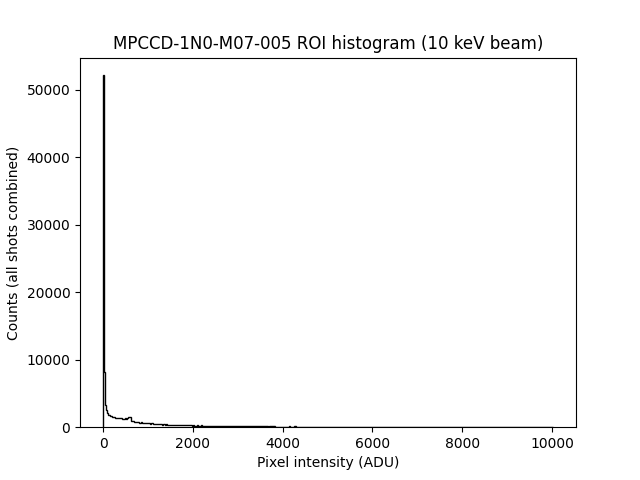

In [229]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616809
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_004.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 410, 500, 430, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

all_values = MPCCD_004.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

all_values = all_values[(all_values > np.percentile(all_values, 1)) &
                        (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD1} ROI histogram (10 keV beam)")
plt.show()

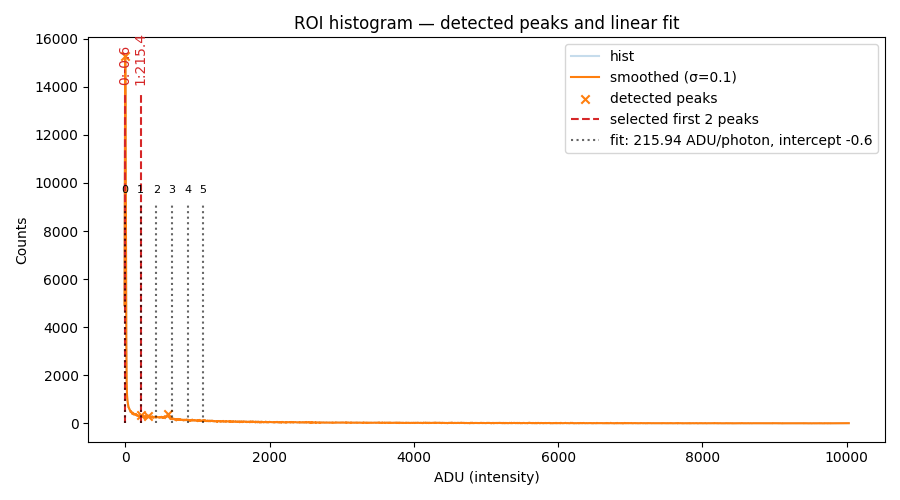

Selected peak ADU positions (first peaks): [ -0.56 215.38]
Slope (ADU / photon): 215.9438
Intercept (ADU): -0.56
R^2 of linear fit (selected peaks): 1.0000
slope: 215.94379603002463, intercept: -0.5619847747758956


In [231]:
results = MPCCD_004.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=0.1, peak_prominence_frac=0.005, n_peaks_needed=2)

print(f'slope: {MPCCD_004.slope}, intercept: {MPCCD_004.intercept}')

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

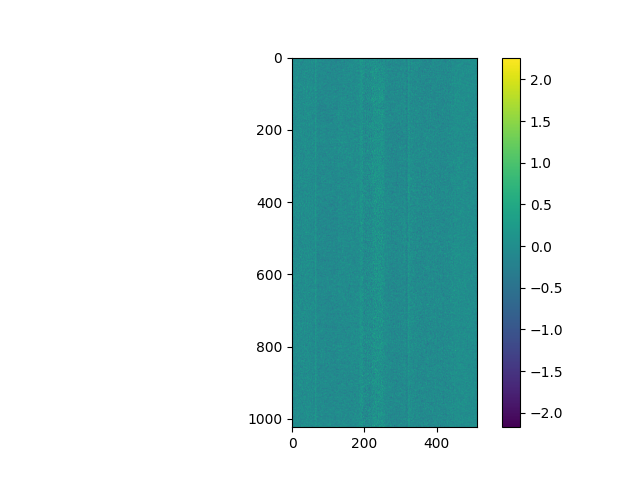

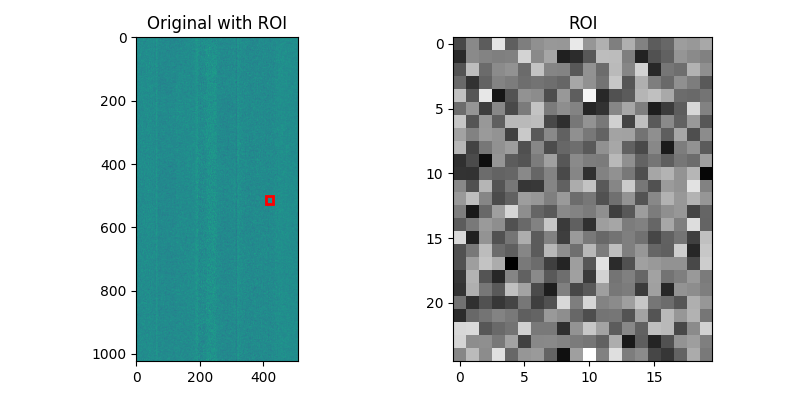

In [209]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616851
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

# Select ROI detector
x1, y1, x2, y2 = 410, 500, 430, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M06-004
900
Run: 1616851
Number of images: 300
Detector ID: MPCCD-1N0-M06-004
Dark runs subtracted
200

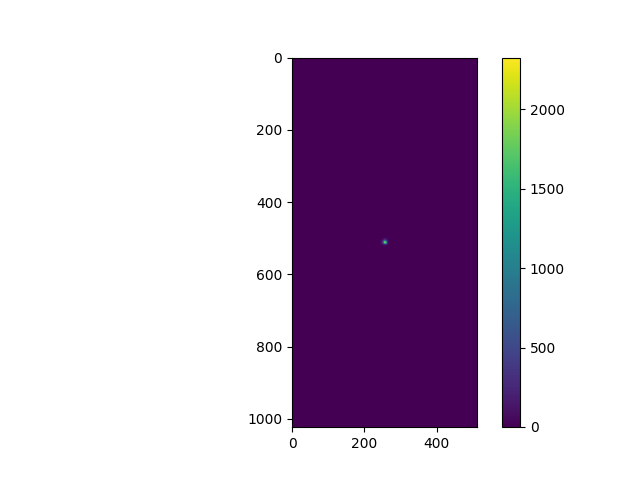

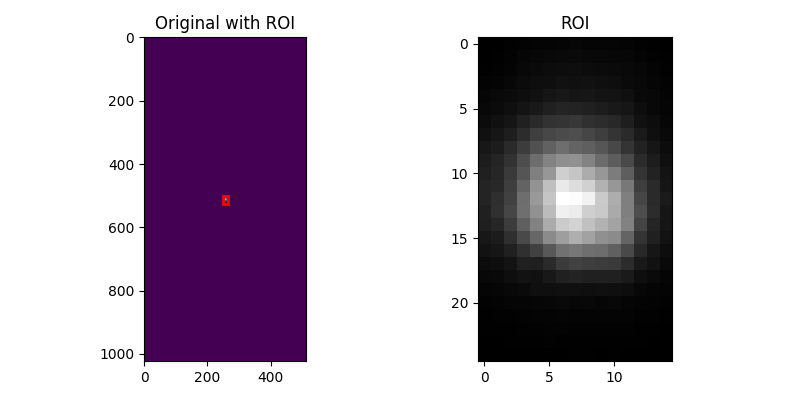

In [210]:
# read in a run and minus the dark #1616809 Direct reference at 2nd MPCCD
runNo = 1616851
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_2.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 250, 500, 265, 525  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title("ROI")

plt.tight_layout()
plt.show()

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

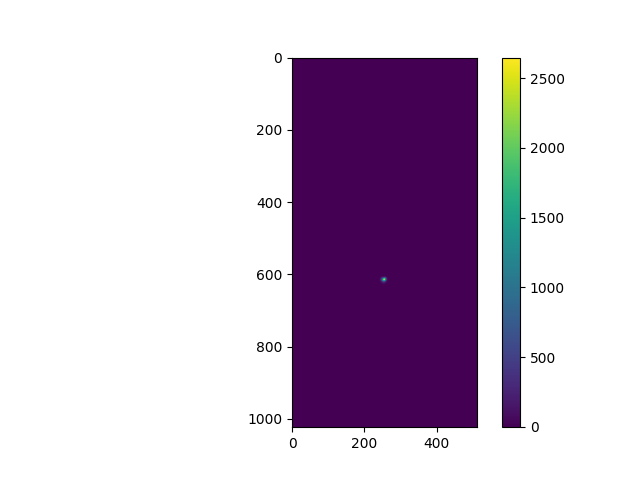

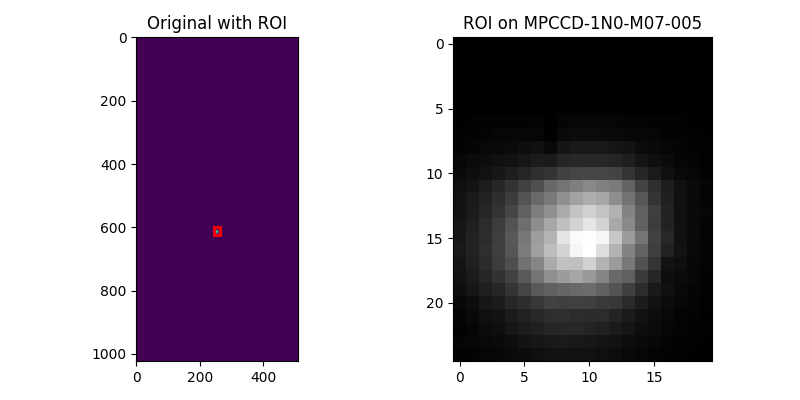

Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
(300, 1024, 512)
Dark runs subtracted
200

/home/blstaff/SACLA_python/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


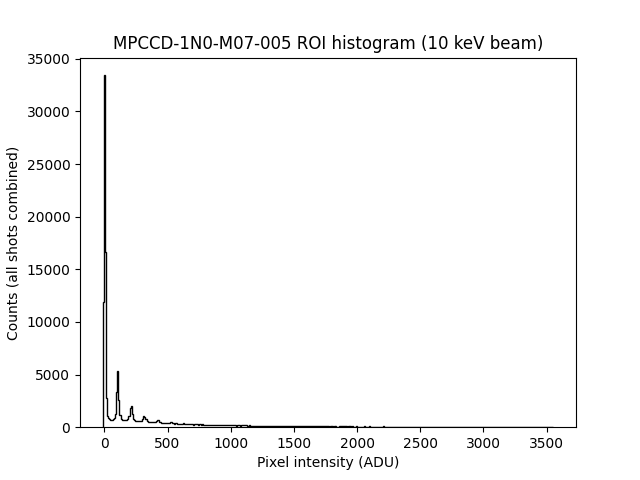

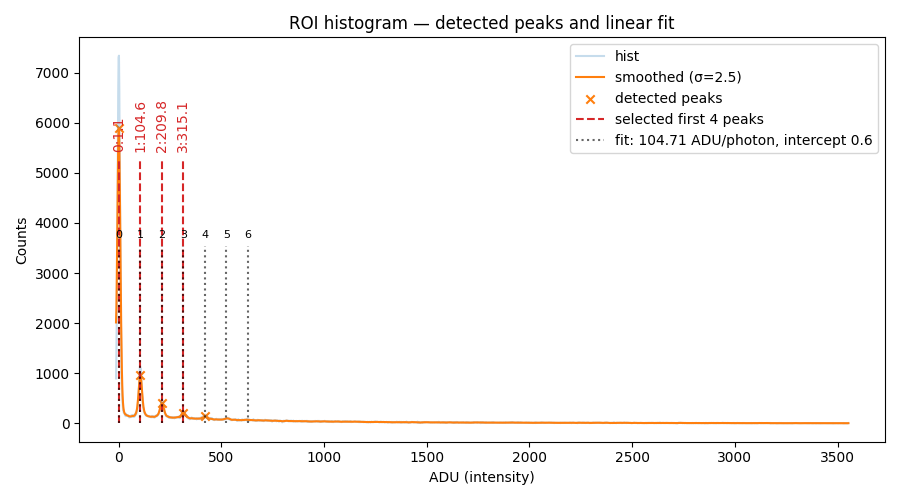

Selected peak ADU positions (first peaks): [  1.14 104.6  209.85 315.09]
Slope (ADU / photon): 104.7097
Intercept (ADU): 0.61
R^2 of linear fit (selected peaks): 1.0000
slope: 104.70965583785608, intercept: 0.6081802735898018


In [222]:
# read in a run and minus the dark #1616809 Direct reference at 3rd MPCCD
runNo = 1616852
runDarkNo = 1616808
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=False)

# Select ROI detector
x1, y1, x2, y2 = 245, 600, 265, 625  # ROI coordinates

roi = im2Dave[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# original image with ROI box
ax[0].imshow(im2Dave)
ax[0].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              edgecolor='red', facecolor='none', lw=2))
ax[0].set_title("Original with ROI")

# ROI itself
ax[1].imshow(roi, cmap='gray')
ax[1].set_title(f"ROI on {detectorID_MPCCD1}")

plt.tight_layout()
plt.show()

all_values = MPCCD_1.create_run_histograms(x1, y1, x2, y2, run = runNo, runDark = runDarkNo)

all_values = all_values[(all_values > np.percentile(all_values, 1)) &
                        (all_values < np.percentile(all_values, 99))]

plt.figure()
plt.hist(all_values, bins=400, histtype='step', color='black')
plt.xlabel("Pixel intensity (ADU)")
plt.ylabel("Counts (all shots combined)")
plt.title(f"{detectorID_MPCCD1} ROI histogram (10 keV beam)")
plt.show()

results = MPCCD_1.find_and_fit_peaks(all_values, nbins=2000, smooth_sigma=2.5, peak_prominence_frac=0.005)

print(f'slope: {MPCCD_1.slope}, intercept: {MPCCD_1.intercept}')

Creating dark run image
Run: 1616808
Number of images: 1000
Detector ID: MPCCD-1N0-M07-005
900
Run: 1616852
Number of images: 300
Detector ID: MPCCD-1N0-M07-005
Dark runs subtracted
200

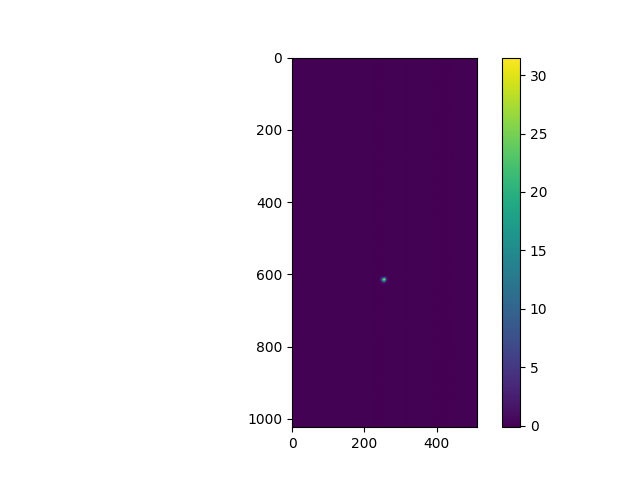

In [224]:
im2Dall, im2Dave = MPCCD_1.load_images(run = runNo, runDark = runDarkNo, calibrate=True)
plt.figure()
plt.imshow(im2Dave)
plt.colorbar()
plt.show()

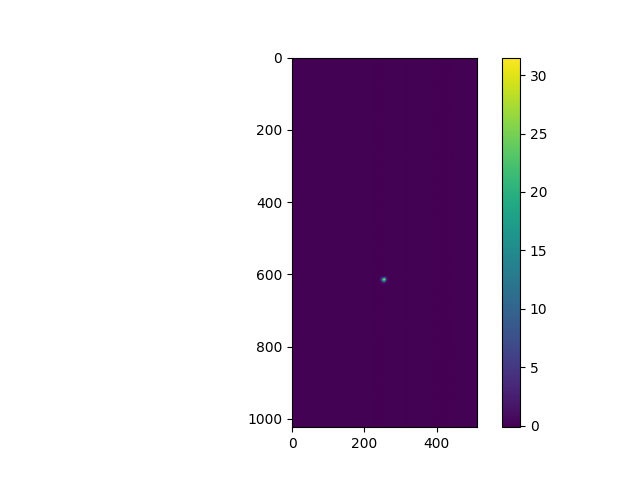